In [22]:
import os
import glob
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.models.feature_extraction import get_graph_node_names
from torchvision.models.feature_extraction import create_feature_extractor
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torch.nn.functional as F


from FileReader import get_picture_tensors
from ModelEvaluation import eval_model

from CatNet.datasets import OrderedDataSet, SiameseDataset
from CatNet.models import CatNet, Autoencoder

In [24]:
n_classes = 32


# classifieur = nn.Sequential(
#     # nn.Dropout(p=0.5),
#     # nn.Linear(9216, 4096),
#     nn.Linear(9216, 1024),
#     nn.ReLU(inplace=True),
#     # nn.Dropout(p=0.5),
#     # nn.Linear(4096, 1024),
#     # nn.ReLU(inplace=True),
#     # nn.Linear(1024, 128),
# )

# encoder = nn.Sequential(
#     # nn.Dropout(p=0.5),
#     # nn.Linear(9216, 4096),
#     nn.Linear(9216, 1024),
#     nn.ReLU(inplace=True),
#     nn.Linear(1024, 128),
#     # nn.Dropout(p=0.5),
#     # nn.Linear(4096, 1024),
#     # nn.ReLU(inplace=True),
#     # nn.Linear(1024, 128),
# )

# decoder = nn.Sequential(
#     nn.Linear(128, 1024),
#     nn.ReLU(inplace=True),
#     nn.Linear(1024, 9216),
#     # nn.Dropout(p=0.5),
#     # nn.Linear(9216, 4096),
#     # nn.Dropout(p=0.5),
#     # nn.Linear(4096, 1024),
#     # nn.ReLU(inplace=True),
#     # nn.Linear(1024, 128),
# )

# encoder = nn.Sequential(
#     nn.Linear(1024, 512),
#     nn.ReLU(inplace=True),
#     # nn.Dropout(p=0.5),
#     # nn.Linear(4096, 1024),
#     # nn.ReLU(inplace=True),
#     # nn.Linear(1024, 128),
# )

# based_model = CatNet(cnn_backbone = 'alexnet', num_classes = 1024, classifier = encoder)
# based_model = CatNet(cnn_backbone = 'alexnet', classifier = encoder, append_classifier = False)
# based_model = CatNet(cnn_backbone = 'alexnet', freeze_all_layer = False, classifier = classifieur)



encoder = nn.Sequential(
    # nn.Dropout(p=0.5),
    # nn.Linear(9216, 4096),
    nn.Linear(1280, 512),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5),
    nn.Linear(512, 128),
    nn.ReLU(inplace=True),
    # nn.Dropout(p=0.5),
    # nn.Linear(4096, 1024),
    # nn.ReLU(inplace=True),
    # nn.Linear(1024, 128),
)

decoder = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(128, 512),
    nn.ReLU(inplace=True),
    # nn.Dropout(p=0.5),
    nn.Linear(512, 1280),
    # nn.Dropout(p=0.5),
    # nn.Linear(9216, 4096),
    # nn.Dropout(p=0.5),
    # nn.Linear(4096, 1024),
    # nn.ReLU(inplace=True),
    # nn.Linear(1024, 128),
)

based_model = CatNet(cnn_backbone = 'mobilenet_v2', classifier = encoder, append_classifier = False)

# model = CatNet(cnn_backbone = 'mobilenet_v2', num_classes = n_classes)

# model.classifier.append(model.classifier[-1])  # copie la sortie un layer plus loin
# model.classifier[-2] = AttentionLayer(1280)
# model.classifier[-2].load_state_dict(torch.load('mobilenetv2_attentionlayer.pth'), strict = False)
# model.classifier[-2].requires_grad = False



based_model.summary()


# model = SiameseNetwork(based_model)
model = Autoencoder(based_model, decoder)


loss_at_each_epoch = []
loss_at_each_epoch_label0 = []
loss_at_each_epoch_label1 = []

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

End of epoch 0
Total loss in epoch:  0.05409365892410278


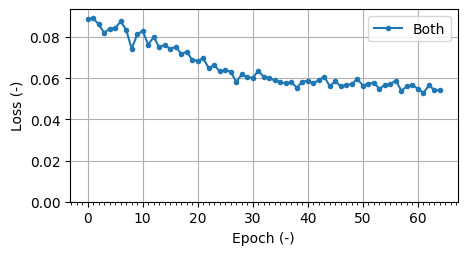

End of epoch 1
Total loss in epoch:  0.05395092815160751


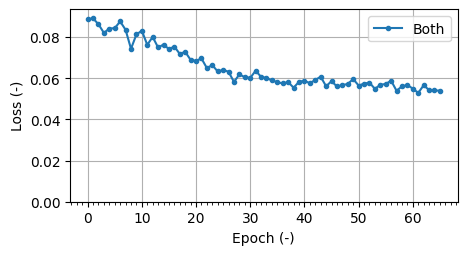

End of epoch 2
Total loss in epoch:  0.051290690898895264


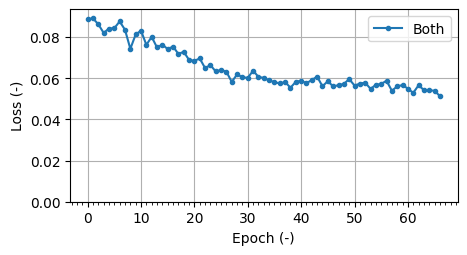

End of epoch 3
Total loss in epoch:  0.05480917543172836


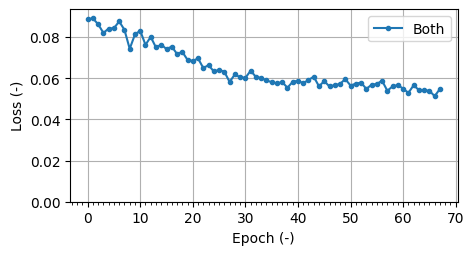

End of epoch 4
Total loss in epoch:  0.05741314962506294


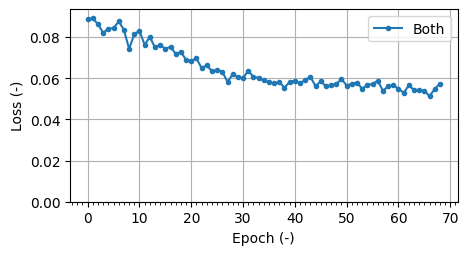

End of epoch 5
Total loss in epoch:  0.05649837106466293


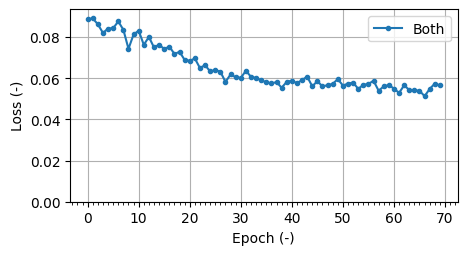

End of epoch 6
Total loss in epoch:  0.05583145469427109


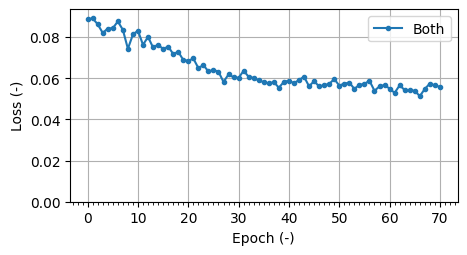

End of epoch 7
Total loss in epoch:  0.05525404214859009


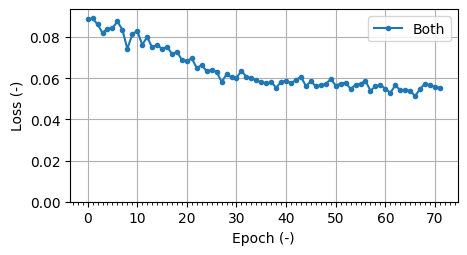

End of epoch 8
Total loss in epoch:  0.053927283734083176


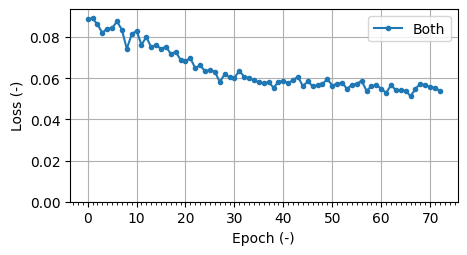

End of epoch 9
Total loss in epoch:  0.0544622428715229


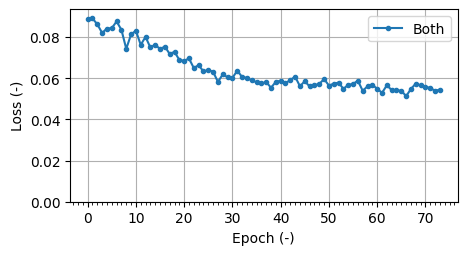

End of epoch 10
Total loss in epoch:  0.05495873838663101


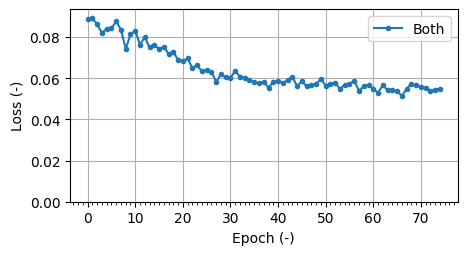

End of epoch 11
Total loss in epoch:  0.05489695072174072


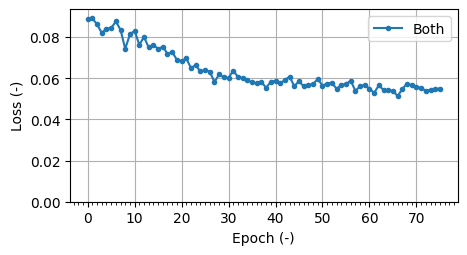

End of epoch 12
Total loss in epoch:  0.05714891105890274


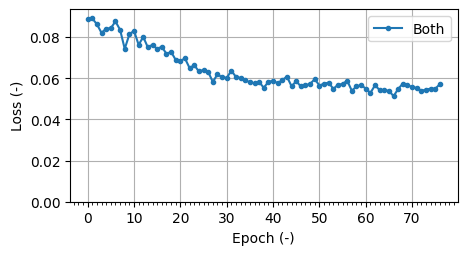

End of epoch 13
Total loss in epoch:  0.055421262979507446


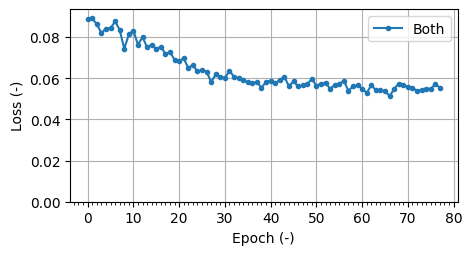

End of epoch 14
Total loss in epoch:  0.05382554605603218


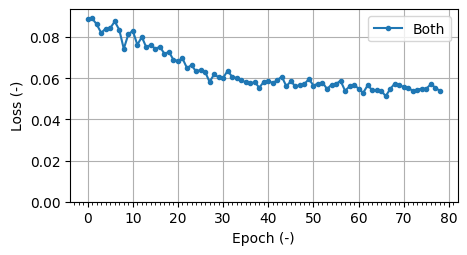

End of epoch 15
Total loss in epoch:  0.05460172891616821


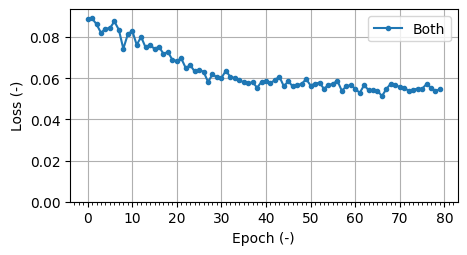

End of epoch 16
Total loss in epoch:  0.05721253156661987


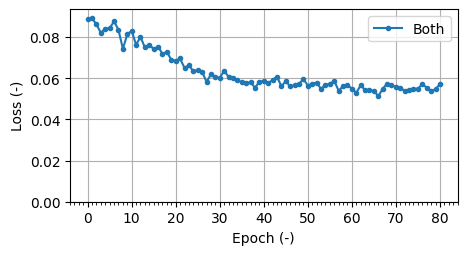

End of epoch 17
Total loss in epoch:  0.05277251452207565


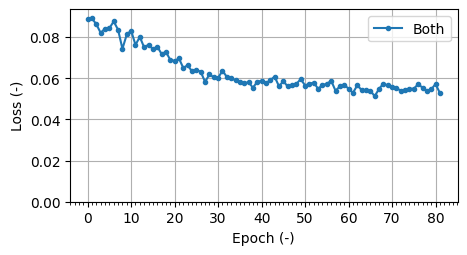

End of epoch 18
Total loss in epoch:  0.05394672229886055


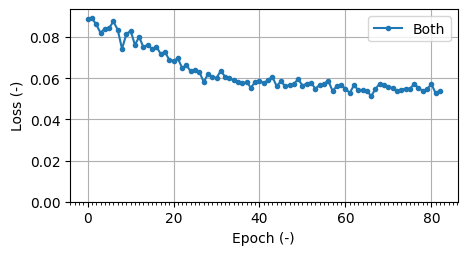

End of epoch 19
Total loss in epoch:  0.05631058290600777


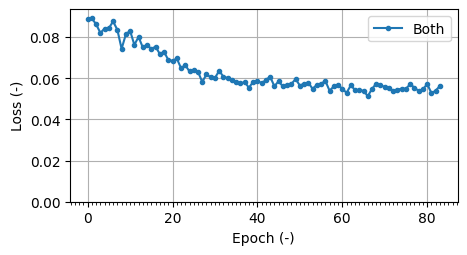

End of epoch 20
Total loss in epoch:  0.05517473816871643


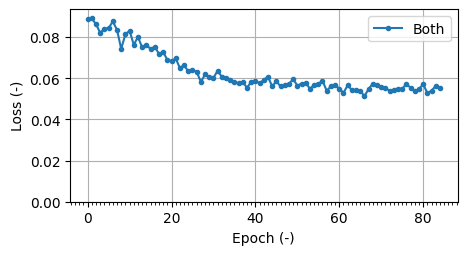

End of epoch 21
Total loss in epoch:  0.05535417050123215


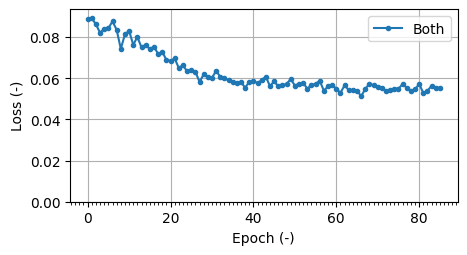

End of epoch 22
Total loss in epoch:  0.05516558885574341


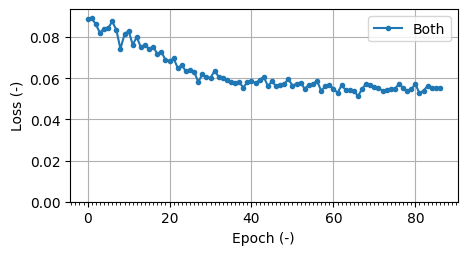

End of epoch 23
Total loss in epoch:  0.05403796583414078


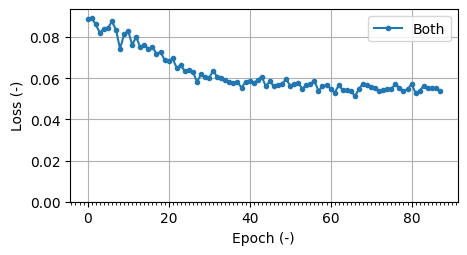

End of epoch 24
Total loss in epoch:  0.05391213297843933


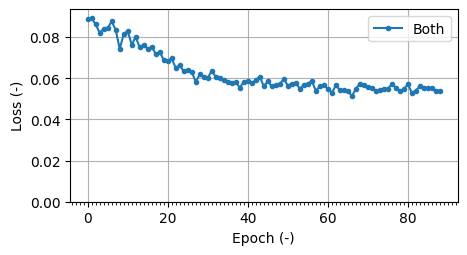

End of epoch 25
Total loss in epoch:  0.05540088564157486


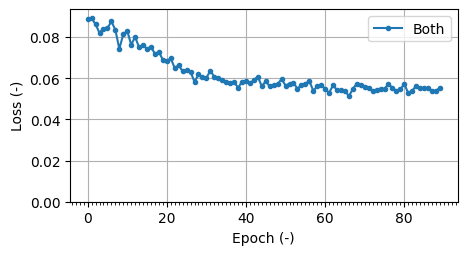

End of epoch 26
Total loss in epoch:  0.054710518568754196


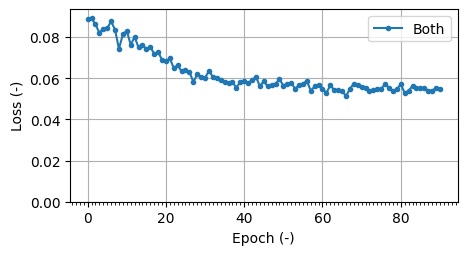

End of epoch 27
Total loss in epoch:  0.05509357526898384


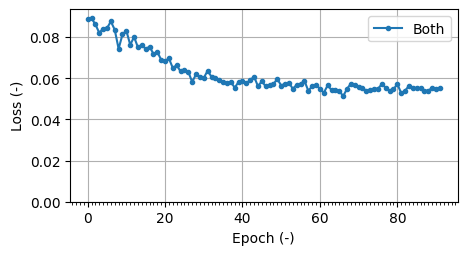

End of epoch 28
Total loss in epoch:  0.05473921820521355


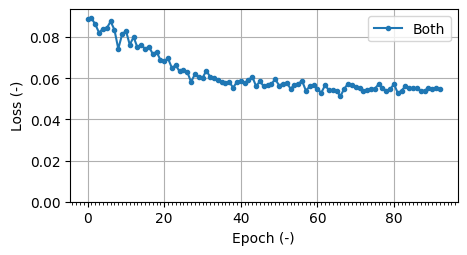

End of epoch 29
Total loss in epoch:  0.05509377643465996


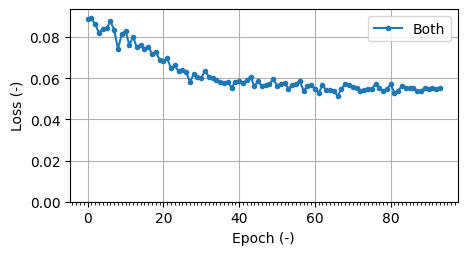

End of epoch 30
Total loss in epoch:  0.05706312134861946


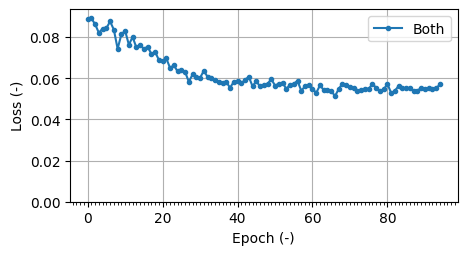

End of epoch 31
Total loss in epoch:  0.056308019906282425


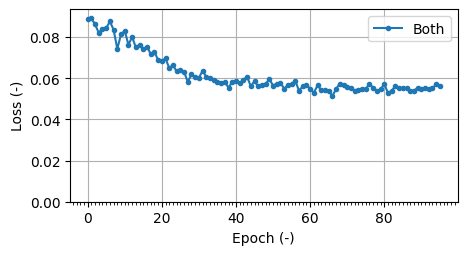

In [28]:

# data params
# root_directory = "normal_prep_datasets/dataset_chat_downscale/"
# root_directory = "normal_prep_datasets/dataset_chat_downscale_no_background/"

root_directory = "dataset_augmented_no_background/"

required_train_imgs = 10
required_test_imgs = 1

num_epochs = 32
# batches_per_epoch = 8
batches_per_epoch = 64

# batch_size = 8
batch_size = 64

# learning_rate = 1e-5
learning_rate = 1e-4
# learning_rate = 1e-3
# learning_rate = 1e-2
# learning_rate = 1e-6

# ratio = [0.75, 0.25]
ratio = 0.95

model.train()




criterion = nn.MSELoss()



params = filter(lambda x: x.requires_grad, model.parameters())
optimizer = optim.Adam(params, lr = learning_rate)

# # Gossage sur les params potentiel
# momentum = 0.5
# optimizer = optim.SGD(params, lr = learning_rate, momentum = momentum)   





for epoch in range(num_epochs):

    (train_images, val_images, test_images, 
    train_labels , val_labels , test_labels , n_classes) = get_picture_tensors(root_directory=root_directory,
                                                                n_classes=n_classes, 
                                                                required_train_imgs=required_train_imgs, 
                                                                required_test_imgs=required_test_imgs,
                                                                use_selected_eval_datasets = False,
                                                                shuffle_directories = True,
                                                                shuffle_images = True, 
                                                                show_progress=False,
                                                                ordered_dataset=True)

    train_ordered_dataset = OrderedDataSet(train_images)
    train_siamese_dataset = SiameseDataset(train_ordered_dataset, ratio, batch_size = batch_size)
    train_dataloader = DataLoader(train_siamese_dataset, batch_size = batch_size, shuffle=True)



    total_loss = 0
    
    # n_label0 = 0
    total_loss_label0 = 0
    # n_label1 = 0
    total_loss_label1 = 0
    
    for imgs_1, imgs_2, labels in train_dataloader:

        optimizer.zero_grad()

        # output1, output2 = model(imgs_1, imgs_2)
        output = model(imgs_1)

        # loss_label0 = criterion(output1[labels == False], output2[labels == False], labels[labels == False])
        # loss_label1 = criterion(output1[labels == True], output2[labels == True], labels[labels == True])
        # loss = criterion(output1, output2, labels)  # ContrastiveLoss

        loss = criterion(model.features(imgs_1), output) 
        # loss = criterion(output1, output2)  # PCALoss

    #     PCALoss(nn.Module):
    # def __init__(self, n_components):
    #     super(PCALoss, self).__init__()
    #     self.n_components = n_components
    #     self.pca = PCA(n_components=n_components)

    # def forward(self, input1, input2):

        total_loss += loss.detach().numpy()
        # total_loss_label0 += loss_label0.detach().numpy()
        # total_loss_label1 += loss_label1.detach().numpy()

        loss.backward()
        optimizer.step()

    print(f"End of epoch {epoch}")
    print("Total loss in epoch: ", total_loss)
    # print("Average loss (same) in epoch: ", total_loss_label1)
    # print("Average loss (diff) in epoch: ", total_loss_label0)

    loss_at_each_epoch.append(total_loss)
    # loss_at_each_epoch_label0.append(total_loss_label0)
    # loss_at_each_epoch_label1.append(total_loss_label1)



    # maxtot = max([max(loss_at_each_epoch), max(loss_at_each_epoch_label0), max(loss_at_each_epoch_label1)])
    maxtot = max(loss_at_each_epoch)

    from matplotlib.ticker import MultipleLocator

    fig, ax = plt.subplots(1, 1, figsize=(5, 2.5))

    ax.set_xlabel('Epoch (-)')
    # ax.set_ylabel('Validation accuracy (%)')
    ax.set_ylabel('Loss (-)')
    # ax.set_ylim(0, 100)
    # ax.set_ylim(0, 7500)
    ax.set_ylim(0, 1.05*maxtot)
    # ax.set_yticks(np.arange(0, 110, 10))
    ax.xaxis.set_minor_locator(MultipleLocator(1))

    ax.plot(loss_at_each_epoch, '.-', label='Both')
    # ax.plot(loss_at_each_epoch_label0, '.-', label='Diff cats')
    # ax.plot(loss_at_each_epoch_label1, '.-', label='Same cat')

    # ax.legend(loc='upper right')
    ax.legend(loc='best')

    plt.grid(True)
    plt.show()


In [21]:


based_model.save_parameters_to_file('mobilenetv2_1280_to_512_to_128_withDropout.pth')


